For a black hole of mass $M$ and spin $\chi \in [0,1]$, the irreducible mass is given by

$M_{irr} = M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}$

I generate the $M_{irr}$ dataset with $M$ normally distributed with mean $\mu$ and standard deviation $\sigma$ and $\chi$ uniformly distributed. I perform Kernel Density Estimation to describe the distribution of $M_{irr}$ and then I perform a KS test between:
- ${M_{\rm irr}}/\mu$ and $f = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}$ as a function of $\sigma$
- $M_{irr}$ and $M$ as a function of $\sigma$

In [13]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os

Generation of $M_{irr}$ dataset

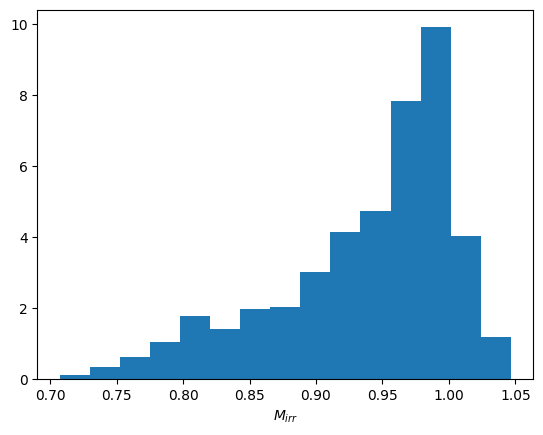

In [14]:
mean = 1
sigma = 0.02

M_irr_data = []
for i in range (0, 1000):
   M = np.random.normal(mean, sigma)
   X = np.random.uniform(low=0.0, high=1.0)
   M_irr_data.append(M*np.sqrt((1+np.sqrt(1-X**2))/(2)))

plt.hist(M_irr_data, density=True, bins=15)
plt.xlabel('$M_{irr}$')
plt.show()

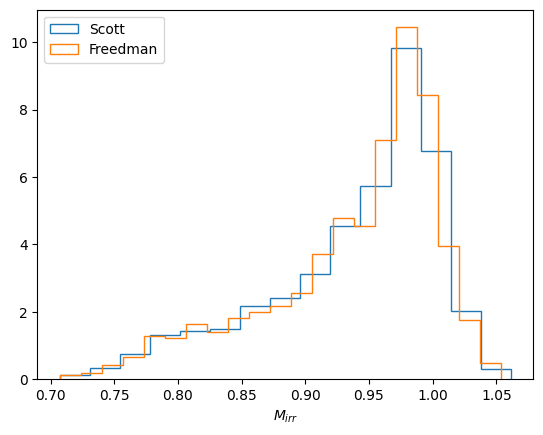

In [15]:
# I plot the histogram using Scott's rule and Freedman-Diaconis rule
import astropy.visualization.hist
astropy.visualization.hist(M_irr_data, bins="scott", histtype="step", density=True, label='Scott')
astropy.visualization.hist(M_irr_data, bins="freedman", histtype="step", density=True, label='Freedman')
plt.xlabel('$M_{irr}$')
plt.legend()
plt.show()

# Kernel Density Estimation

In [16]:
from sklearn.neighbors import KernelDensity
M_irr_array = np.array(M_irr_data)
xgrid = np.linspace(M_irr_array.min(),M_irr_array.max(),100)

# Function for the Kernel Density Estimation
def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # score_samples returns the Log-likelihood of each sample in xgrid
    return np.exp(log_pdf)

I try with the tophat, gaussian and epanechnikov kernel, using different bandwidth.

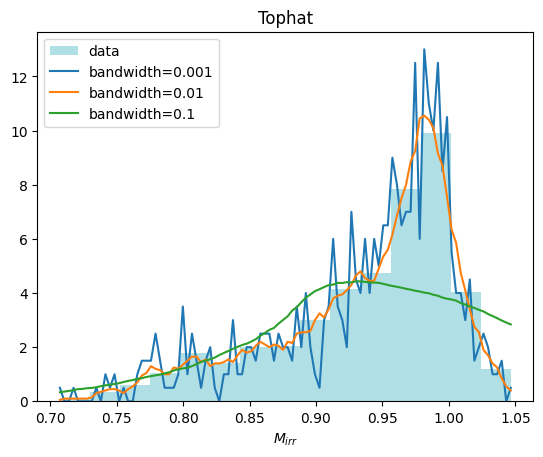

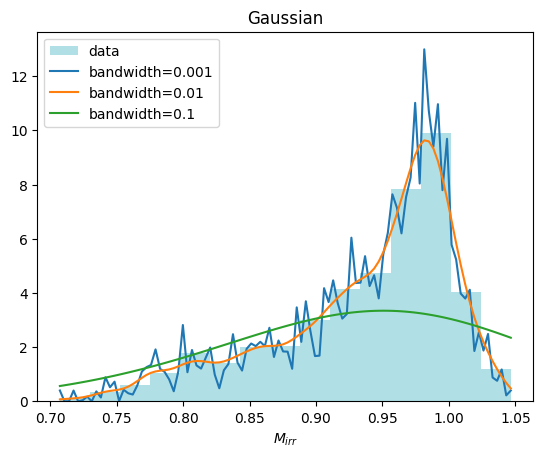

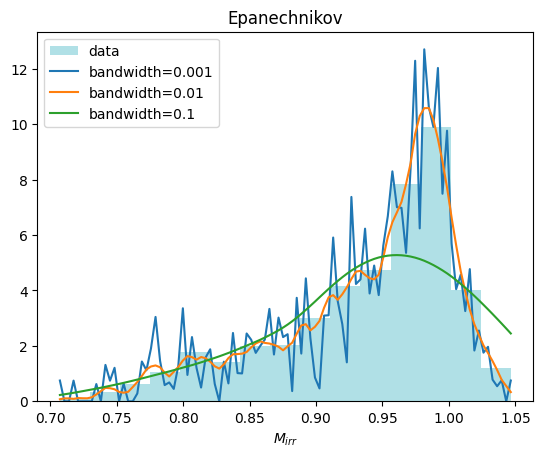

In [17]:
plt.hist(M_irr_array, density=True, bins=15, color='powderblue', label='data')

# I try with gaussian, different bandwidth
PDFtophat = kde_sklearn(M_irr_array, bandwidth=0.001,kernel="tophat") 
plt.plot(xgrid,PDFtophat, label='bandwidth=0.001')

PDFtophat = kde_sklearn(M_irr_array, bandwidth=0.01,kernel="tophat") 
plt.plot(xgrid,PDFtophat, label='bandwidth=0.01')

PDFtophat = kde_sklearn(M_irr_array, bandwidth=0.1,kernel="tophat") 
plt.plot(xgrid,PDFtophat, label='bandwidth=0.1')

plt.xlabel('$M_{irr}$')
plt.title('Tophat')
plt.legend()
plt.show()

# I try with gaussian, different bandwidth
plt.hist(M_irr_array, density=True, bins=15, color='powderblue', label='data')

PDFgauss = kde_sklearn(M_irr_array, bandwidth=0.001,kernel="gaussian") 
plt.plot(xgrid,PDFgauss, label='bandwidth=0.001')

PDFgauss = kde_sklearn(M_irr_array, bandwidth=0.01,kernel="gaussian") 
plt.plot(xgrid,PDFgauss, label='bandwidth=0.01')

PDFgauss = kde_sklearn(M_irr_array, bandwidth=0.1,kernel="gaussian") 
plt.plot(xgrid,PDFgauss, label='bandwidth=0.1')

plt.xlabel('$M_{irr}$')
plt.title('Gaussian')
plt.legend()
plt.show()

# I try with Epanechnikov, different bandwidth
plt.hist(M_irr_array, density=True, bins=15, color='powderblue', label='data')

PDFep = kde_sklearn(M_irr_array, bandwidth=0.001,kernel="epanechnikov") 
plt.plot(xgrid,PDFep, label='bandwidth=0.001')

PDFep = kde_sklearn(M_irr_array, bandwidth=0.01,kernel="epanechnikov") 
plt.plot(xgrid,PDFep, label='bandwidth=0.01')

PDFep = kde_sklearn(M_irr_array, bandwidth=0.1,kernel="epanechnikov") 
plt.plot(xgrid,PDFep, label='bandwidth=0.1')

plt.xlabel('$M_{irr}$')
plt.title('Epanechnikov')
plt.legend()
plt.show()

I select the best bandwidht by eye and I compare tophat, gaussian and epanechnikov kernels.

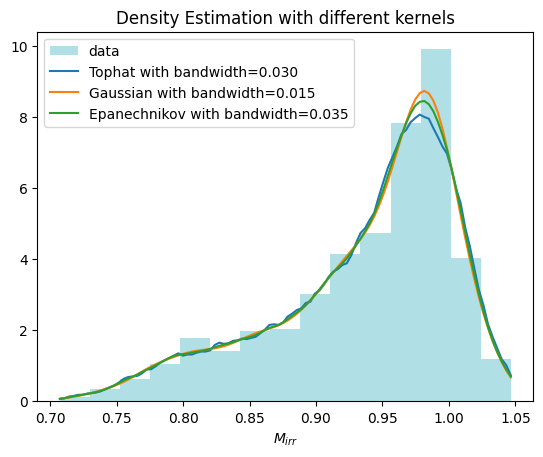

In [18]:
plt.hist(M_irr_array, density=True, bins=15, color='powderblue', label='data')

PDFtophat = kde_sklearn(M_irr_array, bandwidth=0.03,kernel="tophat") 
plt.plot(xgrid,PDFtophat, label='Tophat with bandwidth=0.030')

PDFgauss = kde_sklearn(M_irr_array, bandwidth=0.015,kernel="gaussian") 
plt.plot(xgrid,PDFgauss, label='Gaussian with bandwidth=0.015')

PDFep = kde_sklearn(M_irr_array, bandwidth=0.035, kernel="epanechnikov") 
plt.plot(xgrid,PDFep, label='Epanechnikov with bandwidth=0.035')

plt.xlabel('$M_{irr}$')
plt.title('Density Estimation with different kernels')
plt.legend()
plt.show()

# KS test

KS test between $M_{irr} / \mu$ and $f$ as a function of $\sigma$.

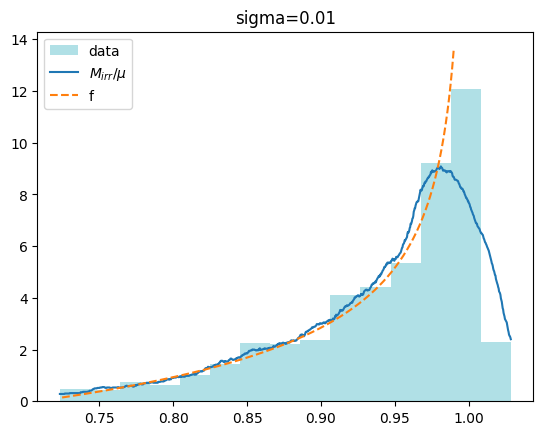

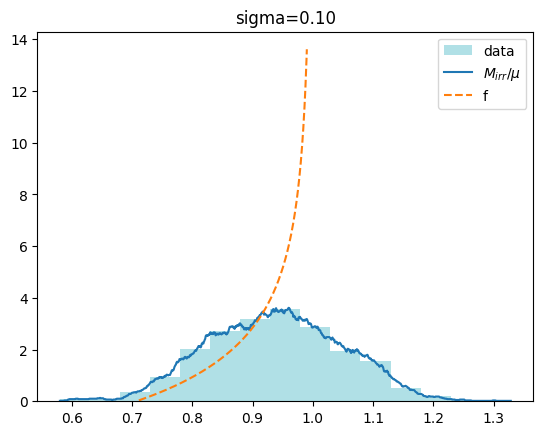

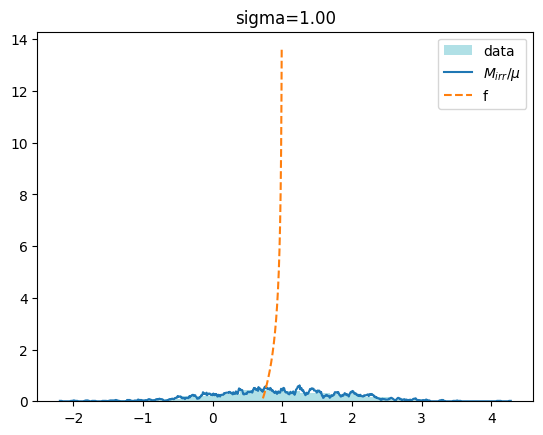

In [19]:
import scipy.stats as st

def pdff(f):
    return 2*(2*f**2-1)/np.sqrt(1-f**2)

sigma_array = []
KS_array = []
for i in range (1, 500):
    sigma = i/100
    sigma_array.append(sigma)
    M_irr_data = []
    f_data = []
    # I generate the M_irr dataset:
    for j in range (0, 1000):
        M = np.random.normal(mean, sigma)
        X = np.random.uniform(low=0.0, high=1.0)
        f_data.append(np.sqrt((1+np.sqrt(1-X**2))/(2)))
        M_irr_data.append(M*np.sqrt((1+np.sqrt(1-X**2))/(2)))

    # I can't plot everything, I plot only 3 cases to visualize the behaviour
    if sigma == 0.01 or sigma == 0.1 or sigma == 1:
        plt.hist(M_irr_data, density=True, bins=15, color='powderblue', label='data')

        M_irr_array = np.array(M_irr_data)
        xgrid = np.linspace(M_irr_array.min(),M_irr_array.max(),1000)
        PDFtophat = kde_sklearn(M_irr_array, bandwidth=0.03,kernel="tophat") 
        plt.plot(xgrid,PDFtophat, label='$M_{irr}$/$\mu$')

        f_array = np.array(f_data)
        xaxis = np.linspace(f_array.min(), f_array.max()-0.01, 1000)
        yaxis = []
        for k in range (0, len(xaxis)):
            yaxis.append(pdff(xaxis[k]))
        plt.plot(xaxis, yaxis, '--', label='f')

        plt.title('sigma=%.2f' %sigma)
        plt.legend()
        plt.show()
    
    # I perform the two-sample Kolmogorov-Smirnov test
    KS = st.ks_2samp(f_data, M_irr_data).statistic   # I save the KS statistic D
    KS_array.append(KS)

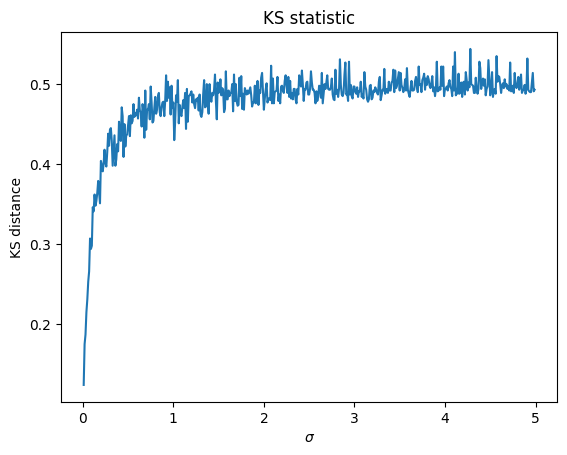

In [20]:
# I plot the result of the KS test as a function of sigma
plt.plot(sigma_array, KS_array)
plt.title('KS statistic')
plt.xlabel('$\sigma$')
plt.ylabel('KS distance')
plt.show()

I know that the lower the KS distance, the more similar the distributions are. I can conlude that $M_{irr}$ is distributed like $f$ if ${\sigma}\ll \mu$.
 

KS test between $M$ and $M_{irr}$ as a function of $\sigma$.

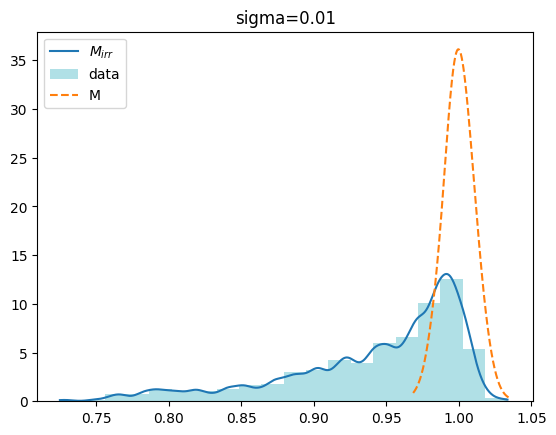

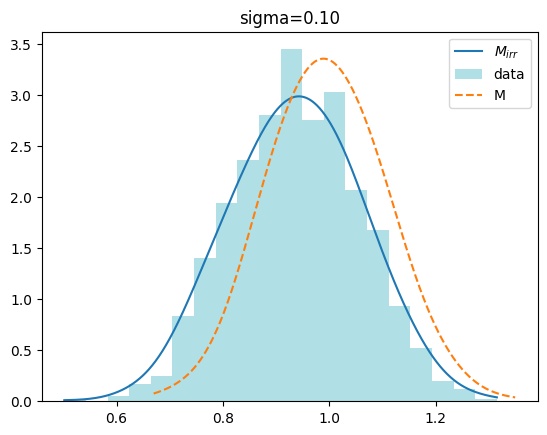

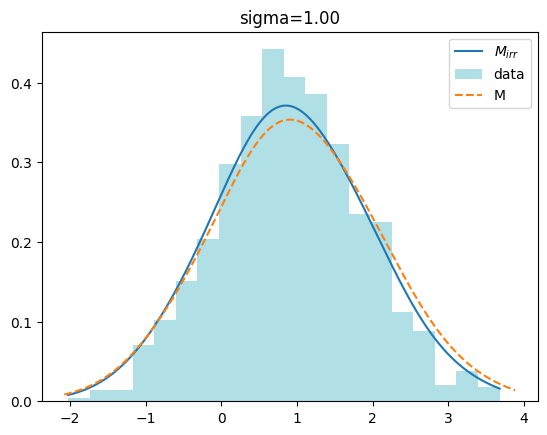

In [21]:
sigma_array = []
KS_array = []
for i in range (1, 500):
    sigma = i/100
    sigma_array.append(sigma)
    M_irr_data = []
    M_data = []
    for j in range (0, 1000):
        M = np.random.normal(mean, sigma)
        X = np.random.uniform(low=0.0, high=1.0)
        M_data.append(M)
        M_irr_data.append(M*np.sqrt((1+np.sqrt(1-X**2))/(2)))

    if sigma == 0.01 or sigma == 0.1 or sigma == 1:
        M_irr_array = np.array(M_irr_data)
        xgrid = np.linspace(M_irr_array.min(),M_irr_array.max(),1000)
        PDFgauss = kde_sklearn(M_irr_array,bandwidth=0.5*sigma,kernel="gaussian") 
        plt.plot(xgrid,PDFgauss, label='$M_{irr}$')

        plt.hist(M_irr_array, density=True, bins=20, color='powderblue', label='data')

        M_array = np.array(M_data)
        xgrid = np.linspace(M_array.min(),M_array.max(),1000)
        PDFgauss = kde_sklearn(M_array,bandwidth=0.5*sigma,kernel="gaussian") 
        plt.plot(xgrid,PDFgauss, '--', label='M')
        
        plt.title('sigma=%.2f' %sigma)
        plt.legend()
        plt.show()
    
    # I perform the two-sample Kolmogorov-Smirnov test
    KS = st.ks_2samp(M_data, M_irr_data).statistic   # I save the KS statistic D
    KS_array.append(KS)

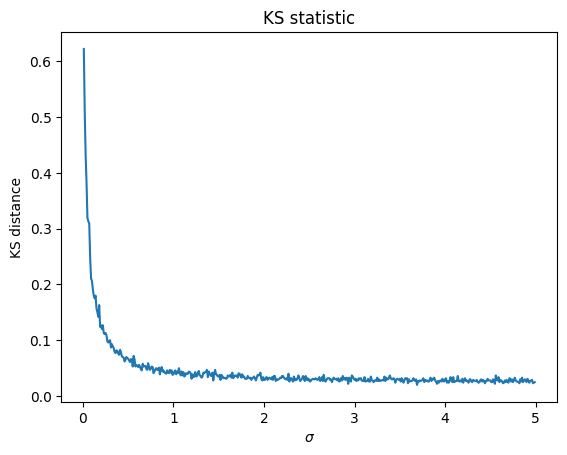

In [22]:
# I plot the result of the KS test as a function of sigma
plt.plot(sigma_array, KS_array)
plt.title('KS statistic')
plt.xlabel('$\sigma$')
plt.ylabel('KS distance')
plt.show()

I know that the lower the KS distance, the more similar the distributions are. I can conlude that $M_{irr}$ is distributed like $M$ if $\sigma\gg \mu$.

# Theoretical PDF of $f$ and $M_{irr}$

I plot the theoretical PDF of $f$ and $M_{irr}$ and I check if they agree with the KDE reconstruction

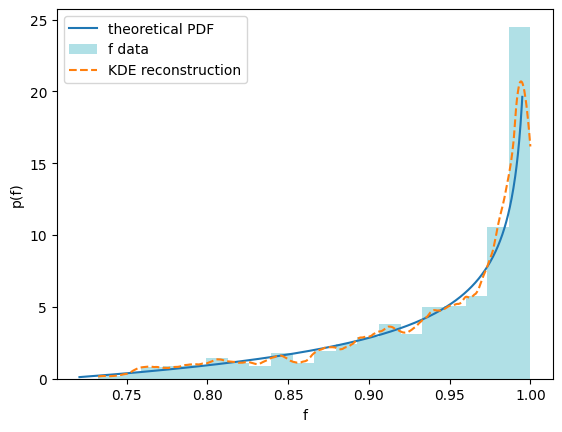

In [23]:
# f

#pdf of f
f_values = np.linspace(f_array.min(),f_array.max()-0.005,1000) # I need to add max-0.005, otherwise the function diverges at f=1
pdf_f = []
for i in range (len(f_values)):
    pdf_f.append(2*(2*f_values[i]**2-1)/np.sqrt(1-f_values[i]**2))

plt.plot(f_values, pdf_f, label='theoretical PDF')

#generated data for f
f_data = []
for i in range (0, 1000):
    X = np.random.uniform(low=0.0, high=1.0)
    f_data.append(np.sqrt((1+np.sqrt(1-X**2))/(2)))

f_array = np.array(f_data)
plt.hist(f_array, density=True, bins=20, color='powderblue', label='f data')
xgrid = np.linspace(f_array.min(),f_array.max(),1000)
PDFep = kde_sklearn(f_array,bandwidth=0.01,kernel="epanechnikov") 
plt.plot(xgrid,PDFep, '--', label='KDE reconstruction')

plt.xlabel('f')
plt.ylabel('p(f)')
plt.legend()
plt.show()

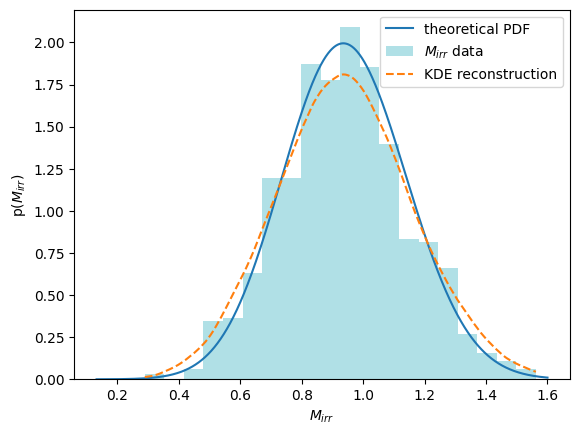

In [24]:
# M_irr

mean = 1
sigma = 0.2
from scipy.integrate import quad
def integrand(x, m):
    return np.exp(-(m/x-mean)**2/(2*sigma**2))*(2*x**2-1)/(x*np.sqrt(1-x**2))

#pdf of M_irr
Mirr_values = np.linspace(f_array.min()-3*sigma,f_array.max()+3*sigma,1000)
pdf_Mirr = []
const = np.sqrt(2/np.pi)/sigma
for i in range (len(Mirr_values)):
   I = quad(integrand, 1/np.sqrt(2), 1, args=Mirr_values[i])
   pdf_Mirr.append(const*I[0])
# quad integrates the function 'integrand' from 1/sqrt(2) to 1. The integration variable is the first argument of the function

plt.plot(Mirr_values, pdf_Mirr, label='theoretical PDF')

#generated data for Mirr
Mirr_data = []
for i in range (0, 1000):
    M = np.random.normal(mean, sigma)
    X = np.random.uniform(low=0.0, high=1.0)
    Mirr_data.append(M*np.sqrt((1+np.sqrt(1-X**2))/(2)))

Mirr_array = np.array(Mirr_data)
plt.hist(Mirr_array, density=True, bins=20, color='powderblue', label='$M_{irr}$ data')
xgrid = np.linspace(Mirr_array.min(),Mirr_array.max(),1000)
PDFep = kde_sklearn(Mirr_array,bandwidth=sigma,kernel="epanechnikov") 
plt.plot(xgrid,PDFep, '--', label='KDE reconstruction')

plt.xlabel('$M_{irr}$')
plt.ylabel('p($M_{irr}$)')
plt.legend()
plt.show()